In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\DSA\Kaggle\fetal_health.csv")

In [3]:
data

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

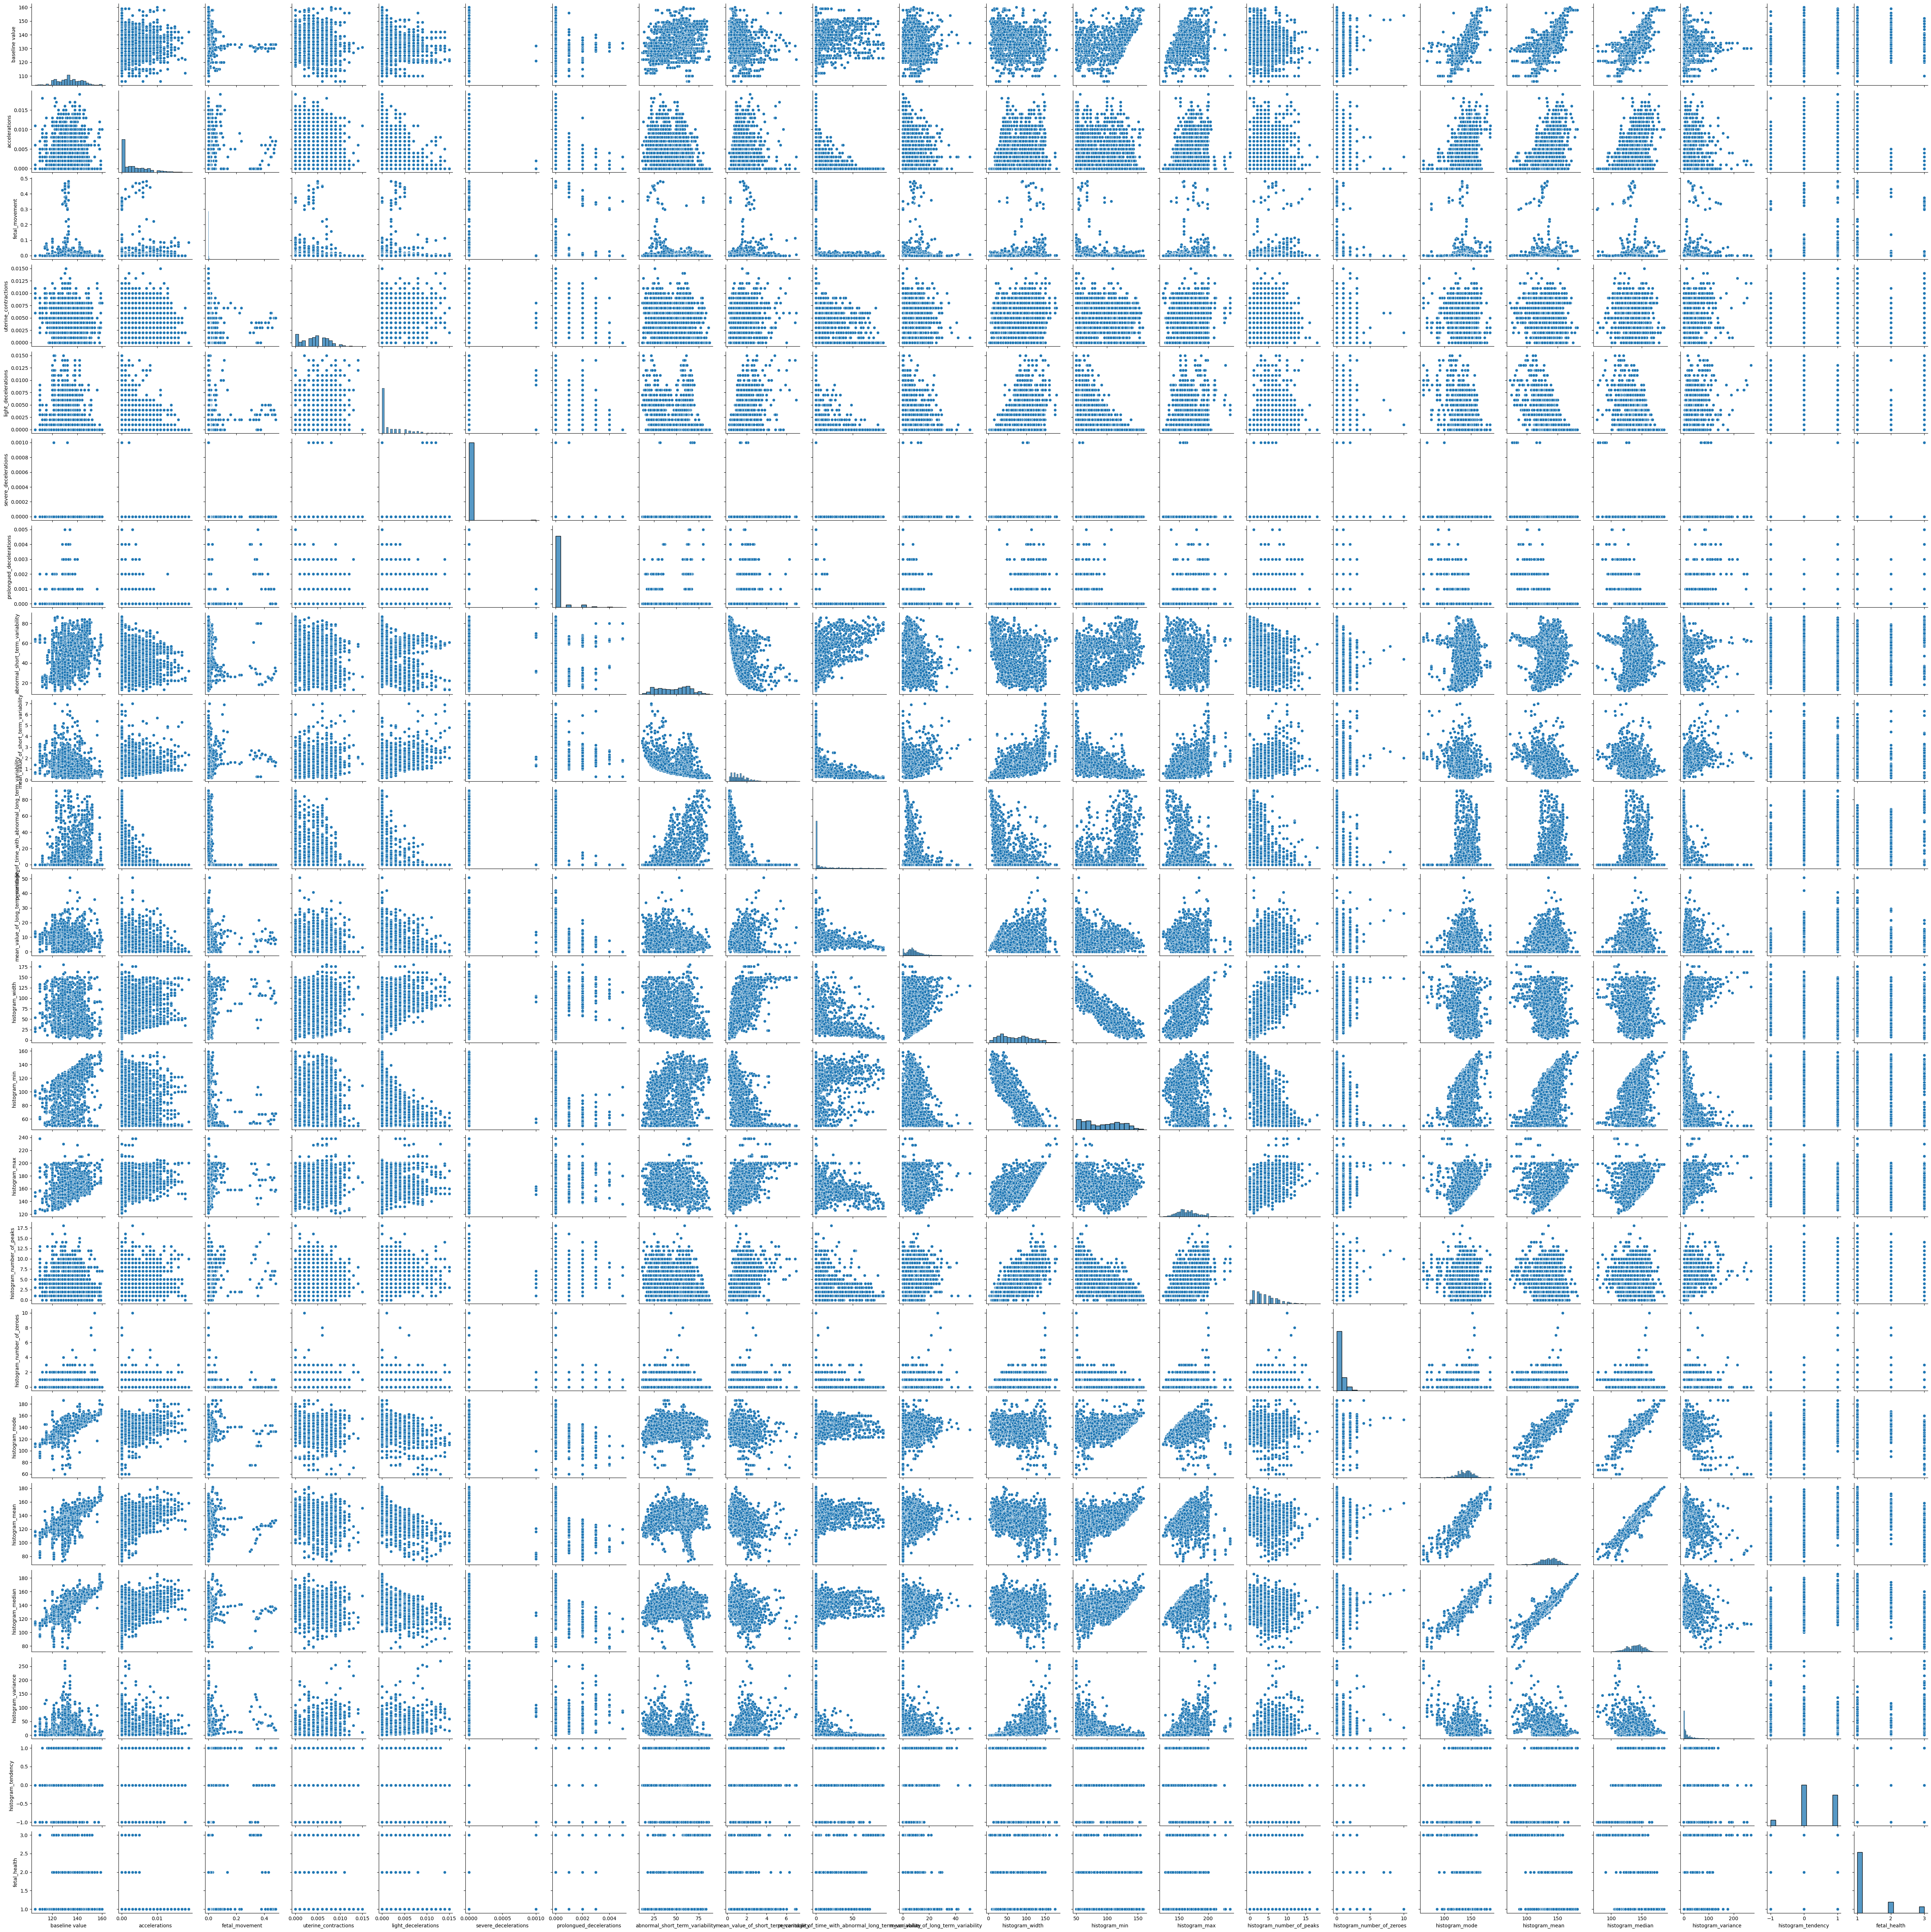

In [4]:
sns.pairplot(data)
plt.show()

In [6]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

In [21]:
x = data.drop('fetal_health', axis = 1)
y = data['fetal_health']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.svm import SVC
svc_clf = SVC(kernel = 'linear')
svc_clf.fit(x_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svc_clf.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       413
         2.0       0.67      0.56      0.61        82
         3.0       0.70      0.81      0.75        37

    accuracy                           0.88       532
   macro avg       0.77      0.77      0.77       532
weighted avg       0.87      0.88      0.87       532



In [12]:
svc_clf.score(x_test, y_test)

0.8778195488721805

In [13]:
cv_scores = cross_val_score(svc_clf, x, y, cv = 5)
cv_scores.mean()

0.8231350455675228

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
dt_clf.score(x_test, y_test)

0.9304511278195489

In [16]:
cv_scores = cross_val_score(dt_clf, x, y, cv = 5)
cv_scores.mean()

0.8273714443523887

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, n_estimators = 200, n_jobs = -1)

In [55]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=200,
                       n_jobs=-1)

In [56]:
rf_clf.score(x_test, y_test)

0.9530075187969925

In [57]:
cv_scores = cross_val_score(rf_clf, x, y, cv = 5)
cv_scores.mean()

0.8650008285004143

In [58]:
from sklearn.model_selection import KFold

In [59]:
kfold = KFold(n_splits = 5)

In [62]:
cv_scores = cross_val_score(rf_clf, x,y, cv = kfold)

In [63]:
cv_scores.mean()

0.8772537972935653

In [64]:
cv_scores.std()

0.06810512399682823

In [65]:
svc_clf = SVC(kernel = 'rbf')
svc_clf.fit(x_train, y_train)

SVC()

In [66]:
cv_scores = cross_val_score(svc_clf, x,y, cv = kfold)

In [67]:
cv_scores.mean()

0.7860756697045015

In [68]:
cv_scores.std()

0.13861647937330482